In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
# 넘파이
# column_stack((x,y))

import numpy as np

np.column_stack(([1,2,3], [4,5,6]))




array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))

print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
# 타깃 데이터 [1] * n + [0] * m

# np.ones(), np.zeros()

print(np.ones(5))

[1. 1. 1. 1. 1.]


In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# sklearn
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)



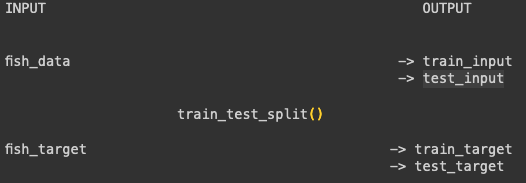

In [ ]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [ ]:
# 샘플링 편향

# stratify 매개변수 타깃데이터 전달 시 클래스 비율(1, 0)

print(test_input)
print("\n\n----------------------------------")
print(test_target)

[[ 32.  340. ]
 [ 12.4  13.4]
 [ 14.3  19.7]
 [ 12.2  12.2]
 [ 33.  700. ]
 [ 36.  714. ]
 [ 35.  720. ]
 [ 35.  725. ]
 [ 38.5 955. ]
 [ 33.5 650. ]
 [ 31.5 500. ]
 [ 29.  430. ]
 [ 41.  950. ]]


----------------------------------
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# 다시 훈련, 테스트 세트 나눔

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# K-Neightbors 모델(K-최근접이웃 모델)
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target)
kn.score(test_input, test_target)


1.0

In [ ]:
# 25, 150 -> 도미

print(kn.predict([[25, 150]]))

[0.]


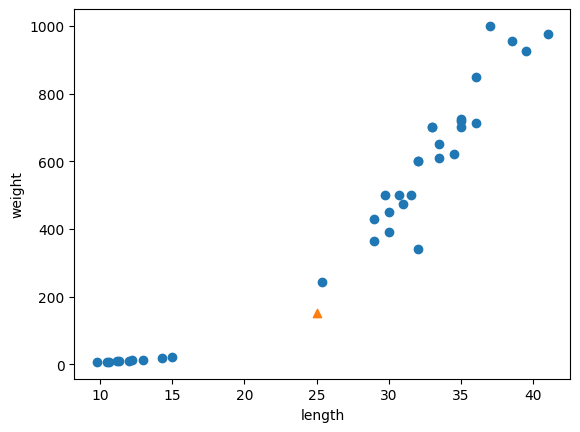

In [ ]:
# 산점도를 그려서 샘플(25cm, 100g)의 위치를 확인

import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])

plt.scatter(25, 150, marker="^")
plt.xlabel('length')
plt.ylabel('weight')

plt.show()


In [ ]:
# K-최근접이웃모델은 주변의 샘플 중에서 다수인 클래스를 예측으로 사용함
# n_neighbors() 기본 값: 5
# 5개의 이웃

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


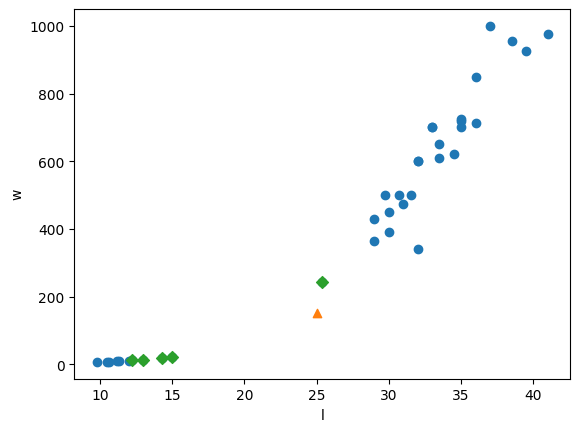

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]])

print(distances, indexes)

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker="D")

plt.xlabel('l')
plt.ylabel('w')

plt.show()

In [ ]:
print("입력데이터")
print(train_input[indexes])
print("\n타깃 데이터")
print(train_target[indexes])


입력데이터
[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]

타깃 데이터
[[1. 0. 0. 0. 0.]]


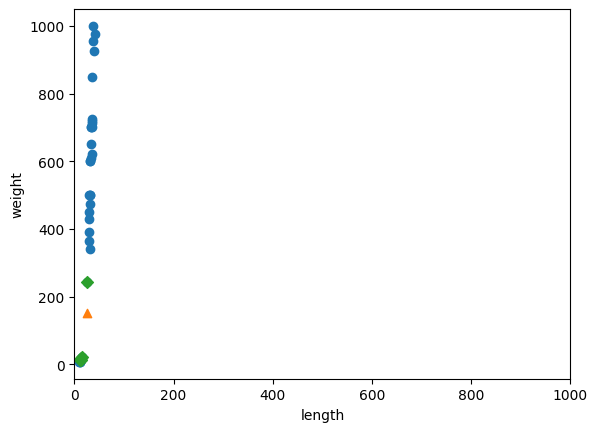

In [ ]:
# 비슷하게 X축의 범위를 0~1000으로 전환
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker="D")

plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [ ]:
# 표준점수: 각 특성 값이 0에서 표준편차의 몇 배만큼 떨여져있는지를 나타냄
# 분산, 표준편차, 표준점수

# 계산 방법: 평균을 빼고 표준편차를 나눠주면 됨

import numpy as np

mean = np.mean(train_input, axis=0) # 0은 행, 1은 열
std = np.std(train_input, axis=0)

print(mean, std)



[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
train_scaled = (train_input - mean) / std
print(mean, std)

print("\n\n\n")

print(train_scaled)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]




[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825

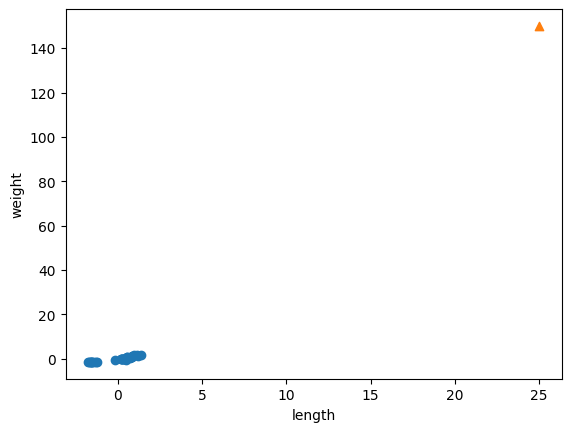

In [ ]:
# 전처리 데이터로 모델 훈련

plt.scatter(train_scaled[:, 0], train_scaled[:,1])
plt.scatter(25, 150, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
new = ([25, 150] - mean) / std

In [ ]:
new

array([-0.23012627, -0.94060693])

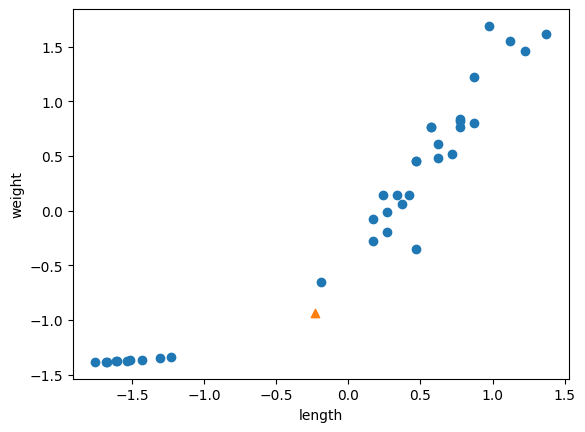

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])

plt.scatter(new[0], new[1], marker="^")

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# k-최근접 이웃 모델 재훈련
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std

kn.score(test_scaled, test_target)

1.0

In [ ]:
# 25cm, 150g => 0(빙어)(X)
# 이번에는? => 1(도미)(O)

kn.predict([new])

array([1.])